In [5]:
# Import essential Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Load the sales dataset (ensure filename matches your CSV)
data = pd.read_csv("Advertising.csv")

# Display first 5 rows to verify data
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# Print column names to understand dataset structure
data.columns


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# Check dataset size, column types, and null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# Check missing values in each column
data.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
# Remove rows with missing values
data = data.dropna()

# Confirm dataset size after cleaning
data.shape


(200, 5)

In [11]:
# Convert text columns (like Platform, Segment, Region) into numeric values
encoder = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col] = encoder.fit_transform(data[col])


In [12]:
# X = input features (all columns except Sales)
# y = target variable (Sales)

X = data.drop("Sales", axis=1)   # Change column name if needed
y = data["Sales"]


In [13]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Create Linear Regression model
model = LinearRegression()

# Train model on training dataset
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Predict sales using test dataset
y_pred = model.predict(X_test)


In [16]:
# Print evaluation metrics to check accuracy
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.465060105010293
Mean Squared Error (MSE): 3.1990044685889067
R2 Score: 0.898648915141708


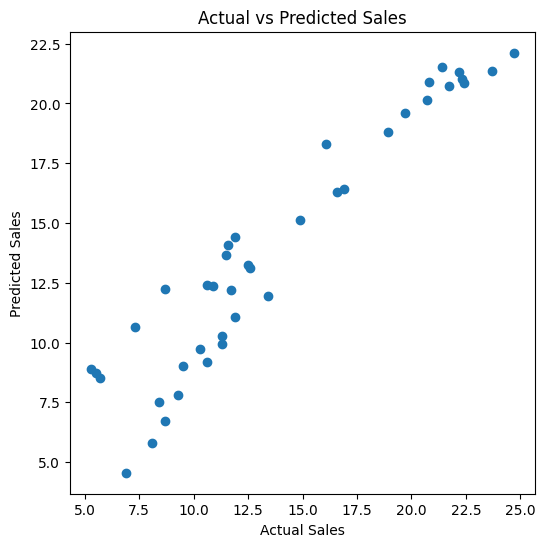

In [17]:
# Plot Actual vs Predicted Sales values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

plt.show()
